## Mission 1. Netflix and Code

### Mandatory Part

넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:
- **한국 작품**은 총 얼마나 있는가?
  - country column을 기준으로 한다.
  - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [1]:
import pandas as pd

netflix = pd.read_csv("./netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### 방법 1. 인덱스 조건으로 찾기

In [2]:
len(netflix[netflix['country']=='South Korea'])

183

#### 방법 2. Group by 이용하기

In [3]:
netflix_by_country = netflix['show_id'].groupby(by = netflix['country'])
netflix_by_country.count()['South Korea']

183

### Bonus Part

넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:
- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
  - country column을 기준으로 한다.
  - **단일 국가**인 경우를 기준으로 결과를 구해보자.

In [4]:
netflix_cnt = netflix_by_country.count()
sngl_cntry = [key for key in netflix_cnt.keys() if ',' not in key]

nflx_cnt_by_sngl_cntry = netflix_cnt.loc[sngl_cntry]
nflx_cnt_by_sngl_cntry[nflx_cnt_by_sngl_cntry == max(nflx_cnt_by_sngl_cntry)]

country
United States    2555
Name: show_id, dtype: int64

## Mission 2. 가즈아!

### Mandatory Part

다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요
- 선의 색깔은 **노란색(#f2a900)**으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.  

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

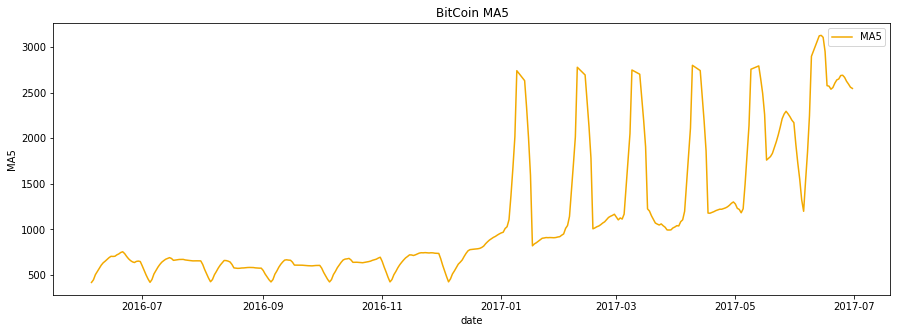

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

bitcoin = pd.read_csv("./BitCoin.csv", index_col = "Date", parse_dates=True, usecols=["Date", "Open"])
bitcoin = bitcoin.sort_values(by='Date')
bitcoin = bitcoin.loc['2016-06-01':'2017-06-30']

bitcoin_ma5 = bitcoin['Open'].rolling(5).mean()

plt.figure(figsize=(15, 5))
plt.title("BitCoin MA5")

plt.xlabel("date")
plt.ylabel("MA5")
#plt.plot(bitcoin.index, bitcoin['Open'], label='Open', color='Aquamarine')
plt.plot(bitcoin_ma5, label='MA5', color='#f2a900')

plt.legend()
plt.show()

### Bonus Part

2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요

- 선의 색깔은 비트코인: **노란색(#f2a900)**, 이더리움: **검은색(#3c3c3d)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

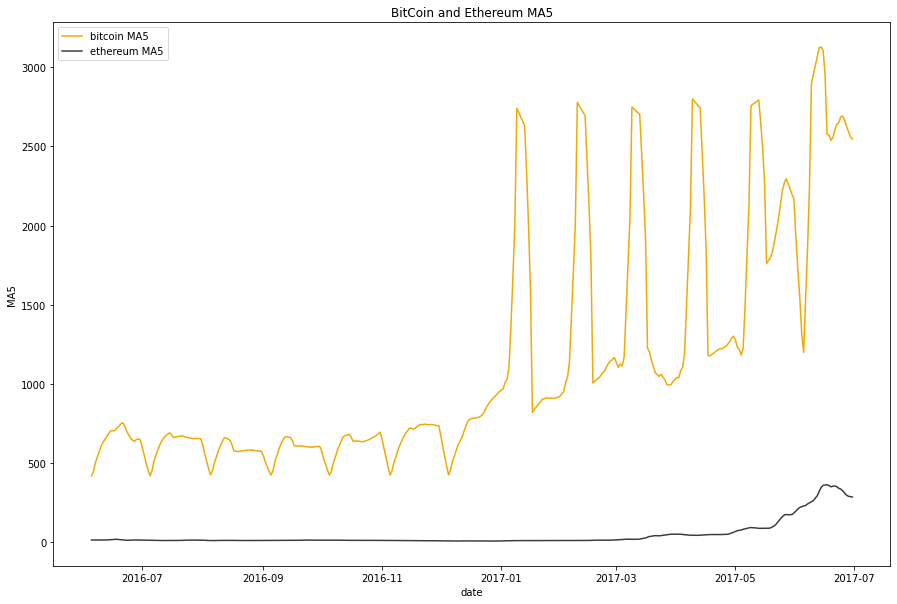

In [6]:
ethereum = pd.read_csv("./ETH_day.csv", index_col = "Date", parse_dates=True, usecols=["Date", "Open"])
ethereum = ethereum.sort_values(by='Date')
ethereum = ethereum.loc['2016-06-01':'2017-06-30']
ethereum_ma5 = ethereum['Open'].rolling(5).mean()

plt.figure(figsize=(15, 10))
plt.title("BitCoin and Ethereum MA5")

plt.xlabel("date")
plt.ylabel("MA5")
plt.plot(bitcoin_ma5, label='bitcoin MA5', color='#f2a900')
plt.plot(ethereum_ma5, label='ethereum MA5', color='#3c3c3d')
plt.legend()
plt.show()

#### 추가

두 값의 범위가 너무 차이나므로 보조 축 추가 + 글씨 크기 키우기

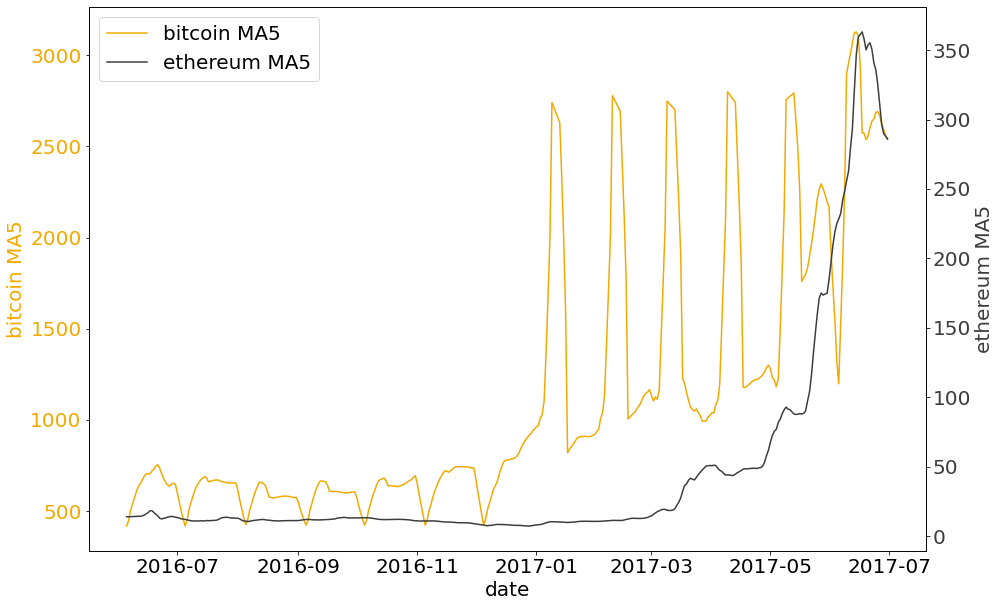

In [7]:
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel("date", fontsize=20)
ax1.set_ylabel("bitcoin MA5", color='#f2a900', fontsize = 20)
ax1.tick_params(axis='x', labelsize = 20)
ax1.tick_params(axis='y', labelcolor='#f2a900', labelsize = 20)

line1 = ax1.plot(bitcoin_ma5, label='bitcoin MA5', color='#f2a900')


ax2 = ax1.twinx()
ax2.set_ylabel("ethereum MA5", color='#3c3c3d', fontsize = 20)
ax2.tick_params(axis='y', labelcolor='#3c3c3d', labelsize = 20)

line2 = ax2.plot(ethereum_ma5, label='ethereum MA5', color='#3c3c3d')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=20)

plt.show()